# Allele Frequency and r

The aim of this notebook is to show that pairs of mutations which are positively or negatively correlated are constrained differently in terms of their allele frequency. 

In [ ]:
from msp_sim import *
from tree_LD_analysis import *
import numpy as np 
import msprime as msprime 
import pandas as pd
import tskit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/msprime-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(276, 200)
(285, 200)
(210, 200)
(218, 200)
(412, 200)
(227, 200)
(205, 200)
(184, 200)
(237, 200)
(273, 200)


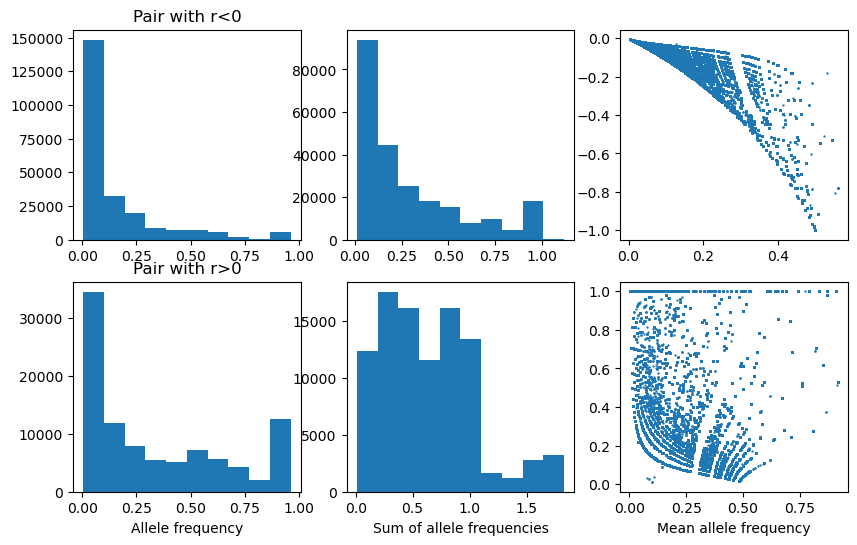

In [44]:
pop_size=10_000
# intialise array
arr=np.empty([0,3])
# simulate
ancestry_reps = msp.sim_ancestry(
    samples=100,
    population_size=pop_size,
    sequence_length=10_000,
    num_replicates=10)
# extract info from tree sequences
for ts in ancestry_reps: # get each ts
    mutated_ts = msp.sim_mutations(ts, rate=1e-7) # mutate
    # get the frequencies and r2 and iteratively add to arr
    r=get_r_matrix(mutated_ts)
    afs=get_afs_from_matrix(mutated_ts)
    for i in range(2,len(afs)):
        for j in range(i-1):
            row=[r[i,j],afs[i],afs[j]]
            arr=np.vstack((arr,row))

# plotting
fig,axs=plt.subplots(2,3,sharey=False,sharex=False,figsize=(10,6))

axs[0,1].hist(arr[arr[:,0]<0][:,1]+arr[arr[:,0]<0][:,2]);
axs[1,1].hist(arr[arr[:,0]>0][:,1]+arr[arr[:,0]>0][:,2]);
axs[1,1].set_xlabel("Sum of allele frequencies")

axs[0,0].hist(arr[arr[:,0]<0][:,1:2])
axs[0,0].set_title("Pair with r<0")
axs[1,0].hist(arr[arr[:,0]>0][:,1:2]);
axs[1,0].set_title("Pair with r>0")
axs[1,0].set_xlabel("Allele frequency")


axs[0,2].scatter((arr[arr[:,0]<0][:,1]+arr[arr[:,0]<0][:,2])/2,arr[arr[:,0]<0][:,0],s=0.5)
axs[1,2].scatter((arr[arr[:,0]>0][:,1]+arr[arr[:,0]>0][:,2])/2,arr[arr[:,0]>0][:,0],s=0.5)
axs[1,2].set_xlabel("Mean allele frequency")
plt.savefig("freqs.pdf")